# 07-1. 인공신경망(p.340)
[[혼자 공부하는 머신러닝+딥러닝] 17강. 인공 신경망 ▶️ 간단한 인공 신경망 모델 만들기](https://youtu.be/ZiP9erf5Fo0?si=Tmkc3gv8HL8aAA6b)

패션 MNIST: 패션 아이템으로 이루어진 분석용 데이터.


In [29]:
from tensorflow import keras
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
# 훈련, 테스트 데이터 나누어 반환

In [30]:
print(train_input.shape, train_target.shape)
# 60,000개의 이미지, 각 이미지는 28*28 크기.

(60000, 28, 28) (60000,)


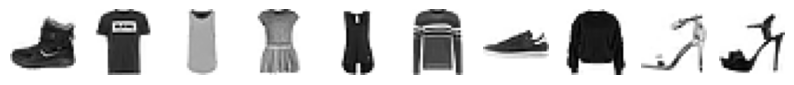

In [31]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 10, figsize=(10,10))
for i in range(10):
  axs[i].imshow(train_input[i], cmap='gray_r')
  axs[i].axis('off')
plt.show()
# 샘플 10개 출력

In [32]:
print([train_target[i] for i in range(10)])

[np.uint8(9), np.uint8(0), np.uint8(0), np.uint8(3), np.uint8(0), np.uint8(2), np.uint8(7), np.uint8(2), np.uint8(5), np.uint8(5)]


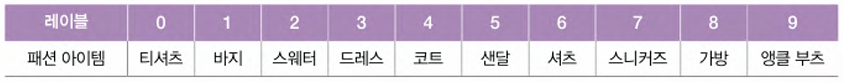

In [33]:
import numpy as np
print(np.unique(train_target, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))


## 로지스틱 회귀로 패션 아이템 분류하기
훈련 데이터 크기가 크므로, 샘플을 하나씩 꺼내서 모델 훈련하기: 확률정 경사하강법(SGDClassifier)

- 확률적 경사하강법?  
여러 특성 중 기울기가 가장 가파른 방향을 따라 이동. 특성마다 값의 범위가 많이 다르지 않아야 함.

In [34]:
train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28*28)

In [35]:
print(train_scaled.shape)
# 784개 픽셀로 이루어진 60,000개 샘플

(60000, 784)


In [36]:
# SGDClassifier 클래스, cross_validate 함수 사용, 교차 검증으로 성능 확인
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier

sc = SGDClassifier(loss='log_loss', max_iter=5, random_state=42)
# loss='log'는 더이상 지원되지 않는다. log_loss 사용해야 함.
# max_iter: SGDClassifier 반복 횟수.
scores = cross_validate(sc, train_scaled, train_target, n_jobs=-1)
print(np.mean(scores['test_score']))

0.8194166666666666


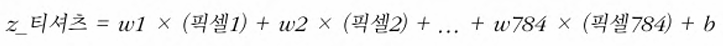

이런 식으로, 로지스틱회귀공식과 같이 픽셀별 가중치와 절편을 다르게 사용하여, 패션 MNIST 데이터의 클래스를 가능한 잘 구분할 수 있도록 모델 파라미터(가중치와 절편)를 찾음.

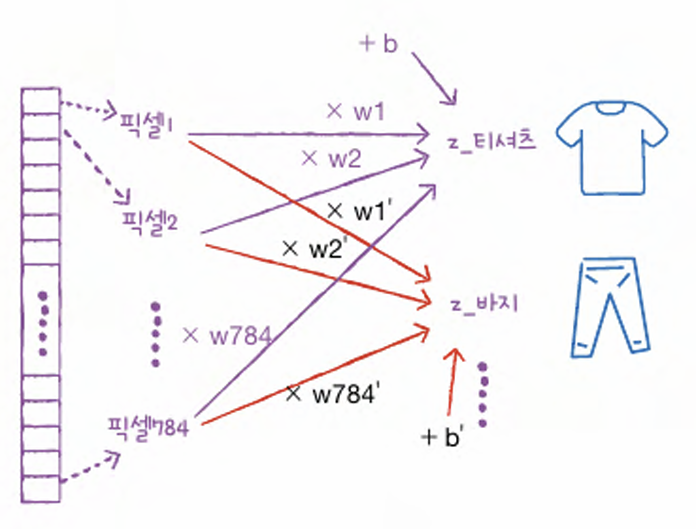

w: 가중치, b: 절편

# 인공 신경망
가장 기본적인 인공신경망은 확률적 경사하강법을 사용하는 로지스틱 회귀와 같다.

 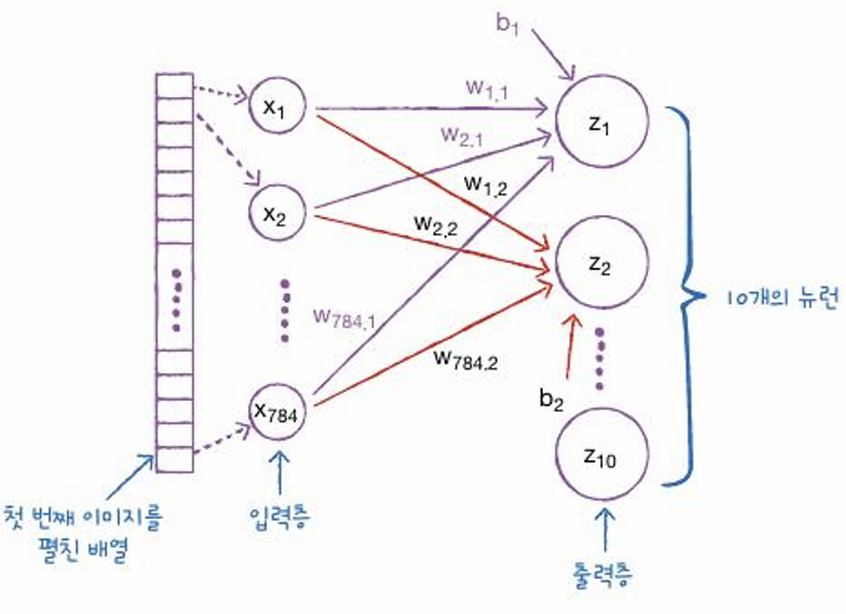

 **출력층**: 클래스 10개 -> z_1~z_10을 계산하고 이를 바탕으로 클래스 예측. 신경망의 최종 값을 만든다.

뉴런: z값 계산 단위(=유닛). 선형 계산이 이루어진다.

**입력층**: x_1~x_784. 픽셀값 자체, 특별한 계산 수행은 없다.

가중치 표기: z_1을 만들기 위해 x_1에 곱해지는 가중치는 w_1.1...

절편: 뉴런마다 하나씩이므로 b_1, b_2...

딥러닝은 인공 신경망(또는 심층 신경망)과 거의 동의어로 사용되는 경우가 많다.

### 텐서플로를 사용해 인공 신경망 모델 만들기

In [37]:
import tensorflow as tf
# 코랩 런타임 유형 GPU로 바꾸기
from tensorflow import keras

케라스 라이브러리는 직접 GPU 연산을 수행하지는 않음, 이를 수행하는 다른 라이브러리를 백엔드로 사용.

인공신경망에서는 교차검증 대신 검증세트를 별도로 나누어 사용한다.
- 딥러닝 분야 데이터셋은 충분히 크기 때문에 검증 점수가 안정적이며,
- 교차검증 수행에 훈련시간이 너무 오래 걸리기 때문.

In [38]:
from sklearn.model_selection import train_test_split
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

In [39]:
print(train_scaled. shape, train_target.shape)

(48000, 784) (48000,)


In [40]:
print(val_scaled.shape, val_target.shape)

(12000, 784) (12000,)


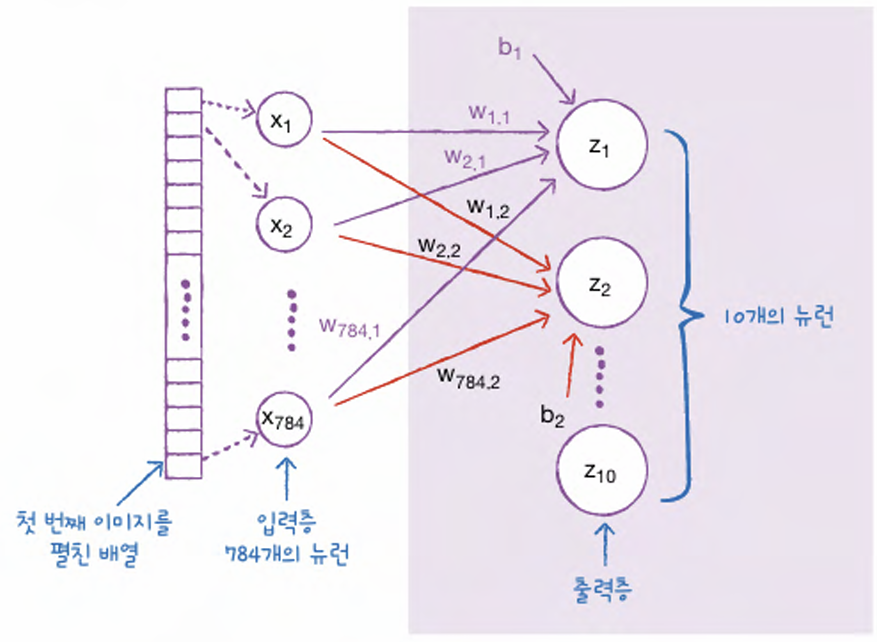

10개의 패션 아이템을 분류하기 위해 10개 뉴런으로 구성됨.

케라스의 레이어 패키지에 다양한 층 존재

**밀집층**: Dense layer란 신경망에서 가장 기본적인 층(layer)으로써, 각 입력 노드가 모든 출력 노드에 연결되어 있는 완전연결층(Fully Connected Layer)이다. 이 층은 입력과 출력 사이의 매핑을 생성하며, 각 연결은 가중치를 가지며, 노드는 bias를 가질 수 있다. 이러한 Dense Layer는 신경망이 복잡한 패턴을 학습하는 데 있어 중요한 역할을 한다.

In [41]:
dense = keras.layers.Dense(10, activation='softmax', input_shape=(784,))
# (뉴런 개수, 뉴런 출력에 적용할 함수, 입력의 크기)
# 10개 패션아이템 분류, 10개 뉴런에서 출력되는 값을 확률로 바꾸는 소프트맥스 함수, 10개 뉴런이 각각 몇 개의 입력을 받는지 튜플로 지정
# 이진분류라면 시그모이드 함수: activation='sigmoid'

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


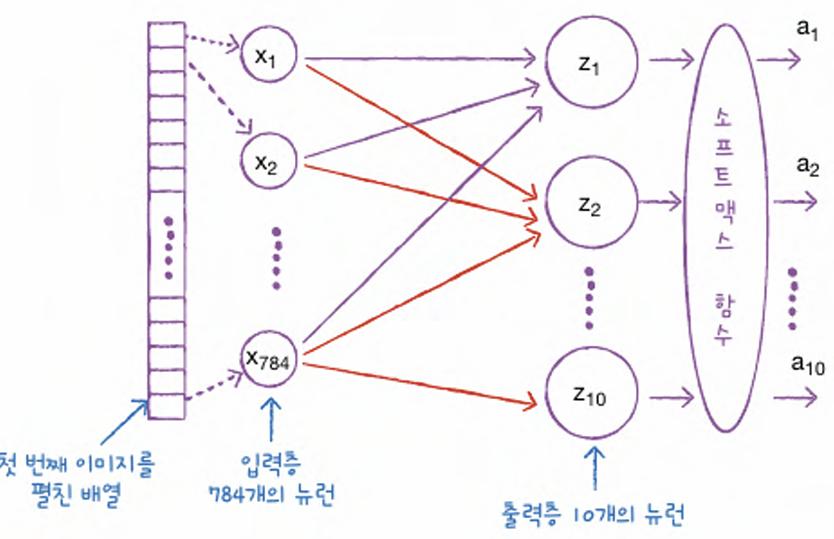

In [42]:
model = keras.Sequential([dense])

활성화 함수는 별도의 층인가?:

시그모이드, 소프트맥스 같은 활성화 함수는 뉴런 출력에 바로 적용되므로 보통 츠으이 일부로 나타내나, 종종 따로 부르는 경우도 있다.

가중치와 절편으로 선형 계산을 수행하는 층을 좁은 개념의 신경망 층으로 생각한다면, 소프트맥스 층은 넓은 의미의 층이라 볼 수 있다.

### 인공신경망으로 패션 아이템 분류하기

케라스 모델: 훈련 전 설정 단계가 있음-model 객체의 compile() 메서드.

손실 함수의 종류, 훈련 과정에서 계산하고 싶은 측정값 지정.

In [43]:
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# 다중 분류에서는 크로스 엔트로피 손실 함수 사용
# 이진 분류: 'binary_crossentropy', 다중 분류: 'categorical_crossentropy'

**이진분류**: 출력층 뉴런이 하나임. 이 뉴런이 출력하는 확률값 a(시그모이드 함수의 출력값)를 사용해 양성 클래스와 음성 클래스에 대한 크로스 엔트로피를 계산.

이진 분류의 출력 뉴런은 오직 양성 클래스에 대한 확률(a)만 출력하므로, 음성 클래스에 대한 확률은 1-a.

타깃값이 양성 샘플은 1, 음성 샘플은 0으로 되어있음, 특별히 음성 샘플인 경우 (1-타깃값)으로 계산.

=> 하나의 뉴런으로 양성과 음성 클래스에 대한 크로스 엔트로피 손실을 모두 계산.

**다중분류**: 각 클래스에 대한 확률이 모두 출력되므로, 타깃에 해당하는 확률만 남겨놓기 위해, 나머지 확률에는 모두 0을 곱함.

원-핫 인코딩: 타깃값을 해당 클래스만 1, 나머지는 0인 배열로 만드는 것.

다중 분류에서 크로스 엔트로피 손실 함수를 사용하려면 0, 1, 2와 같이 정수로 된 타깃값을 원-핫 인코딩으로 변환해야 함.

텐서플로에서는 정수 타깃값을 원핫인코딩으로 바꾸지 않고 그냥 사용 가능.  
sparse_categorical_crossentropy: 정수로 된 타깃값을 사용해 크로스 엔트로피 손실을 계산.  
타깃값을 원핫인코딩으로 준비했다면, complie() 메스드에 손실 함수를 loss='categorical_crossentropy'로 지정하면 됨.

metrics: 케라스는 모델이 훈련할 때 기본으로 에포크마다 손실값을 출력. 손실이 줄어드는 것뿐만 아니라 정확도를 함께 출력하면 훈련이 잘 됨을 알 수 있으므로 'accuracy' 지정.


In [44]:
model.fit(train_scaled, train_target, epochs=5)
# (입력, 타깃, 반복할 에포크 횟수)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7367 - loss: 0.7809
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8333 - loss: 0.4856
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8457 - loss: 0.4539
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8512 - loss: 0.4357
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.8550 - loss: 0.4246


In [45]:
model.evaluate(val_scaled, val_target)
# evaluate(): 케라스 모델 성능 평가 메서드

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8527 - loss: 0.4281


[0.43702206015586853, 0.8524166941642761]

# 심층 신경망


In [46]:
from tensorflow import keras
# 데이터 다시 불러오기
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

In [47]:
from sklearn.model_selection import train_test_split
train_scaled = train_input / 255.0 # 이미지 픽셀값 0~1 사이로 변환
train_scaled = train_scaled.reshape(-1, 28*28) # 28*28의 2차원 배열을 784 크기의 1차원 배열로 펼침
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

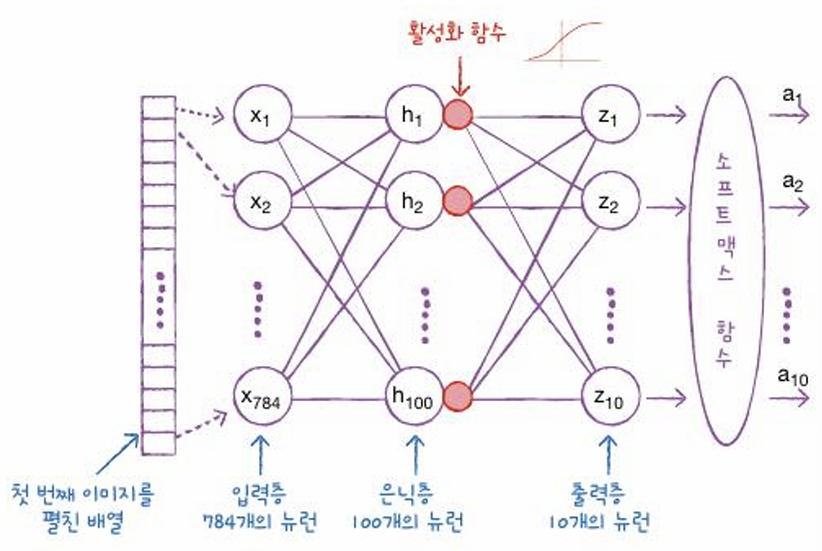

**은닉층**: 입력층과 출력층 사이에 있는 모든 층.

활성화 함수: 신경망 층의 선형 방정식의 계산값에 적용하는 함수. 출력층에 적용하는 활성화 함수는 종류 제한됨(이진분류면 시그모이드, 다중분류면 소프트맥스). 은닉층 활성화 함수는 비교적 자유로움. 모든 신경망의 은닉층에는 항상 활성화 함수가 있다.


**시그모이드 함수** : 뉴런의 출력 z값을 0과 1 사이로 압축함.

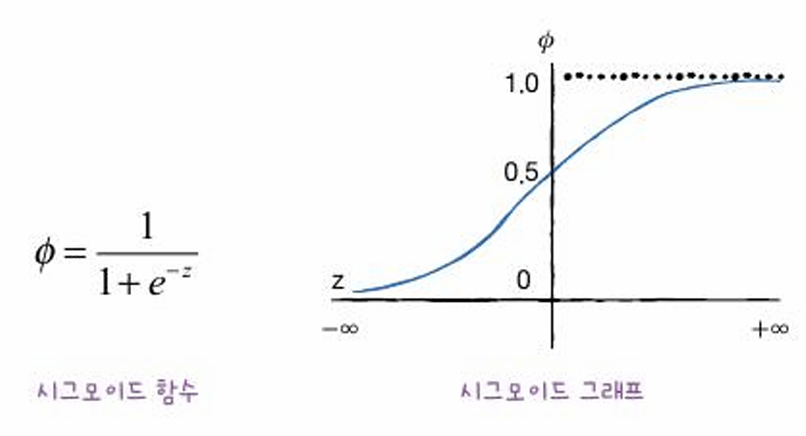

In [48]:
dense1 = keras.layers.Dense(100, activation='sigmoid', input_shape=(784,)) # 은닉층, 100개 뉴런을 가진 밀집층.
# 은닉층의 뉴런 개수를 정하는 데는 특별한 기준이 없으나, 적어도 출력층의 누런보다는 많게 만들어야 함.
dense2 = keras.layers.Dense(10, activation='softmax') # 출력층, 10개 클래스를 분류하므로 10개 뉴런.

## 심층 신경망 만들기

In [49]:
model = keras.Sequential([dense1, dense2]) # dense1과 2 객체를 Sequential 클래스에 추가하여 심층신경망을 만듦
# 가장 처음 등장하는 은닉층에서, 마지막 출력층의 순서로 나열

In [50]:
model.summary()
# 케라스에서는 summary() 메서드로 층에 대한 유용한 정보 얻을 수 있음.

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

model.summary() 해석
- 모델 이름
- 모델에 들어있는 층이 순서대로 나열됨. 은닉층~출력층 순서. 층마다 층 이름, 클래스, 모델 파라미터 개수 출력. name 매개변수로 이름 지정 가능, 지정하지 않으면 자동으로 'dense'라고 이름 붙임.
- 첫 번째 층의 출력 크기 (None, 100): (샘플의 개수, 은닉층의 뉴런 개수). 샘플 개수가 아직 정의되지 않아 None.
- 케라스 모델의 fit() 메서드에 훈련 데이터를 주입하면, 데이터를 나누어 여러 번에 걸쳐 경사 하강법 단계를 수행함.
- 케라스의 기본 미니배치 크기는 32개, fit() 메서드의 batch_size 매개변수로 바꿀 수 있음.
- 모델 파라미터 개수: Dense 층이므로 입력 픽셀 784개*100개 모든 조합에 대한 가중치 있음, 뉴런마다 1개의 절편이 있음.(+100개)
- 두 번째 층의 출력 크기 (None, 100): 모델 파라미터 개수는, 100개의 은닉층 뉴런+10개의 출력층 뉴런+뉴런마다 하나의 절편(10개)
- 마지막: 총 파라미터 개수(은닉_출력층 파라미터 개수)
- 훈련되지 않는 파라미터: 간혹 경사 하강법으로 훈련되지 않는 파라미터를 가진 층이 있는 경우, 이런 층의 파라미터 개수가 나타남.

## 층을 추가하는 다른 방법

In [51]:
# 추가되는 층을 한눈에 알아볼 수 있는 방법
# 모델 이름과 달리 층 이름은 영문이어야 함.
model = keras.Sequential([
    keras.layers.Dense(100, activation='sigmoid', input_shape=(784,), name='hidden'),
    keras.layers.Dense(10, activation='softmax', name='output')], name='패션 MNIST 모델')

In [52]:
model.summary()

Model: "패션 MNIST 모델"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ hidden (Dense)                       │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output (Dense)                       │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

이전과 동일하게 2개 Dense층 추가됨, 파라미터 개수도 같음. 모델 이름고 층 이름이 달라짐: 여러 모델과 많은 층 사용시 name 매개변수를 사용하면 구분이 쉽다.

In [53]:
# 많은 층을 추가할 때 add() 메서드 사용
model = keras.Sequential()
model.add(keras.layers.Dense(100, activation='sigmoid', input_shape=(784,)))
model.add(keras.layers.Dense(10, activation='softmax'))

In [54]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [55]:
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7560 - loss: 0.7684
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8488 - loss: 0.4226
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8608 - loss: 0.3863
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8703 - loss: 0.3596
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8763 - loss: 0.3400


## 렐루(ReLu) 함수

시그모이드 함수의 단점: 오른쪽과 왼쪽 끝으로 갈수록 그래프가 누워있기 때문에 올바른 출력을 만드는 데 신속하게 대응하지 못함. 특히 층이 많은 심층 신경망일수록, 그 효과가 누적되어 학습을 더 어렵게 만듦: ReLu 함수의 등장.

**렐루 함수**:
입력이 양수일 경우-활성화 함수가 없는 것처럼 그냥 입력 통과시킴, 음수일 경우 0으로 만듦. 심층신경망에서 뛰어난 함수.  
max(0, z). 특히 이미지 처리에서 좋은 성능을 냄.

In [56]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
# reshape()로 직접 1차원으로 펼치는 대신 케라스에서 제공하는 Flatten 층 사용, 입력층 바로 뒤에 추가함.
# 입력 차원을 모두 펼치는 역할만 하므로 성능에 기여하진 않지만, 입력층과 은닉층 사이에 추가하므로 층이라 부름.
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [57]:
model.summary()
# flatten 클래스에 포함된 모델 파라미터는 0이다.

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

훈련 데이터 다시 준비하여 모델 훈련

In [58]:
(train_input, train_target), (test_input, test_target) =\
keras.datasets.fashion_mnist.load_data()
train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

In [59]:
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7713 - loss: 0.6708
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8588 - loss: 0.3965
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8705 - loss: 0.3534
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.8832 - loss: 0.3231
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8864 - loss: 0.3120


In [61]:
model.evaluate(val_scaled, val_target)
# 성능 향상된 확인

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8522 - loss: 0.4220


[0.42818114161491394, 0.8523333072662354]

## 옵티마이저
하이퍼파라미터: 모델이 학습하지 않아 사람이 지정해주어야 하는 파라미터. 신경망에는 특히 하이퍼파라미터가 많다.

추가할 은닉층의 개수는 모델이 학습하는 것이 아니라, 우리가 지정해주어야 할 하이퍼파라미터임.  
은닉층의 뉴런 개수, 활성화 함수, 층의 종류도 하이퍼파라미터.

케라스는 기본적으로 미니배치 경사하강법을 사용, 미니배치 개수는 32개. fit() 메서드의 batch_size 매개변수에서 조정 가능, 역시 하이퍼파라미터임. fit() 메서드의 epochs 매개변수도 하이퍼파라미터임.


**옵티마이저**: 케라스에서 제공하는 다양한 종류의 경사 하강법 알고리즘. compile() 메서드에서는 케라스의 기본 경사하강법 알고리즘인 RMSprop을 사용함. RMSprop의 학습률 또한 조정할 하이퍼파라미터 중 하나.

가장 기본적 옵티마이저: SGD.

In [63]:
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# tenserflow.keras.optimizers 패키지 아래 SGD 클래스로 구현되어 있음.

# 아래 코드와 동일함:
# sgd = keras.optimizers.SGD()
# model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 학습률을 지정할 수 있음(기본값 0.01)
# sgd = keras.optimizers.SGD(learning_rate=0.1)

다양한 옵티마이저 종류

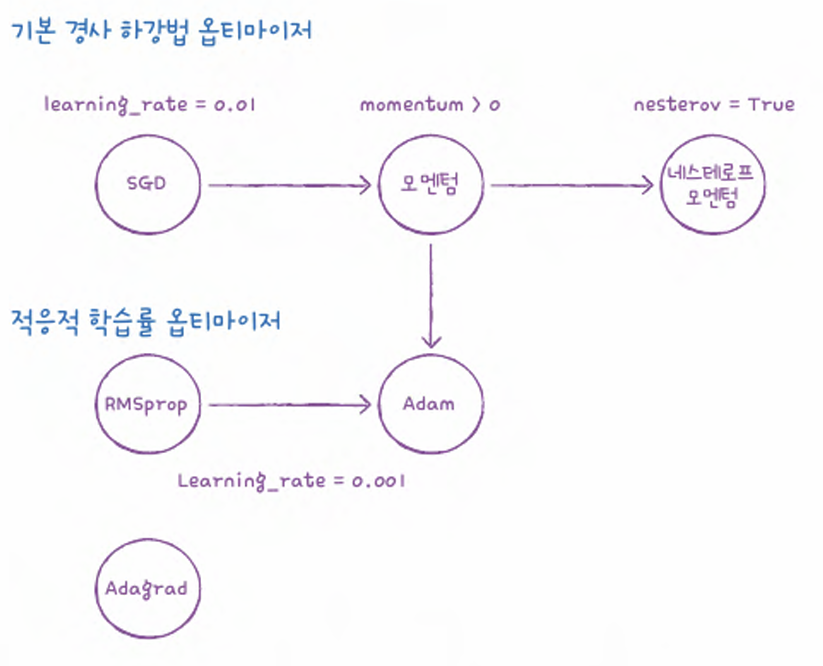

**기본 경사하강법 옵티마이저**: SGD 클래스에서 제공. momentum 매개변수의 기본값은 0, 이를 0보다 큰 값으로 지정하면 마치 이전의 그레이디언트를 가속도처럼 사용하는 모멘턴 최적화를 사용, 보통 모멘텀 매개변수는 0.9 이상을 지정.

SGD 클래스의 nesterov 매개변수를 True로 바꾸면 네스테로프 모멘텀 최적화(=네스테로프 가속 경사) 사용.

`sgd = keras.optimizers.SGD(momentum=0.9, nesterov=True`

**적응적 학습률**: 모델이 최적점에 가까이 갈수록 학습률을 낮춤, 안정적으로 최적점에 수렴할 가능성 높음.  
대표적 옵티마이저: Adagrad, RMSprop. 기본값이 RMSprop임.

모멘텀 최적화와 RMSprop의 장점을 접목한 것이 Adam. 맨 처음에 시도해볼만한 좋은 알고리즘임.

In [64]:
model=keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [66]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7671 - loss: 0.6730
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8571 - loss: 0.3986
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8711 - loss: 0.3528
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8803 - loss: 0.3277
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8872 - loss: 0.3080


In [67]:
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8853 - loss: 0.3243


[0.327923983335495, 0.8801666498184204]